In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
market = pd.read_csv('/content/Advertising.csv')
market.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
market = market.drop('Unnamed: 0', axis=1)
market.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
market.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [5]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Descriptive Analysis

In [6]:
market.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

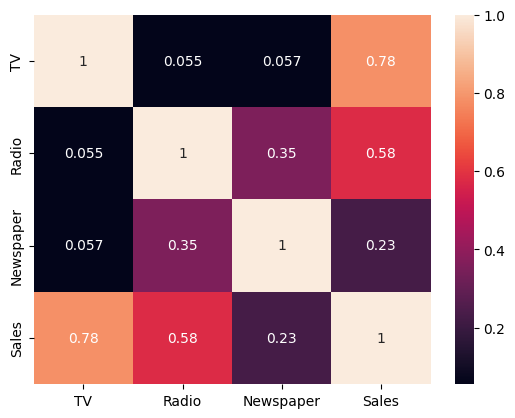

In [7]:
marketcorr =  market.corr()
marketcorr

sns.heatmap(marketcorr, annot=True)

In [8]:
X = market.drop('Sales', axis=1)
y = market['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

In [10]:
marketreg = LinearRegression()
marketreg.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = marketreg.predict(X_test)

In [12]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred)* 100)

Mean Absolute Error: 1.060100369671974
Mean Squared Error: 1.8134061110827382
R-squared: 93.37311941397313


In [13]:
marketpoly = LinearRegression()
marketpoly.fit(X_train, y_train)

LinearRegression()

## Multiple Linear Regression

In [14]:
X1 = market.drop(['TV','Radio','Newspaper'], axis=1)
y1 = market['Sales']

In [15]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [16]:
market_mulit = LinearRegression()
market_mulit.fit(X1_train, y1_train)

LinearRegression()

In [17]:
y_pred = market_mulit.predict(X1_test)

In [18]:
print('Mean Absolute Error:', mean_absolute_error(y1_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y1_test, y_pred))
print('R-squared:', r2_score(y1_test, y_pred)* 100)

Mean Absolute Error: 1.9169850891861035e-15
Mean Squared Error: 6.051220527132845e-30
R-squared: 100.0


## Polynominal Regression

In [19]:
X_poly = PolynomialFeatures(degree=8)
X_train_poly = X_poly.fit_transform(X_train)

In [20]:
y_pred = marketpoly.predict(X_test)

In [21]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred)* 100)

Mean Absolute Error: 1.060100369671974
Mean Squared Error: 1.8134061110827382
R-squared: 93.37311941397313


## Decision Tree Regressor

In [22]:
marketdecision = DecisionTreeRegressor()
marketdecision.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
y_pred = marketdecision.predict(X_test)

In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred)* 100)

Mean Absolute Error: 0.7699999999999998
Mean Squared Error: 1.2414999999999998
R-squared: 95.46308342225666


## Random Forest Regressor

In [25]:
marketrandom = RandomForestRegressor()
marketrandom.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred = marketrandom.predict(X_test)

In [27]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred)* 100)

Mean Absolute Error: 0.5335249999999997
Mean Squared Error: 0.43990812500000026
R-squared: 98.39240719694202


## XGBoost Regressor

In [28]:
marketxgb = XGBRegressor(n_estimators=1000, max_depth=3, eta=0.15, subsample=0.6, colsample_bytree=0.8)
marketxgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.15, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

In [29]:
y_pred = marketxgb.predict(X_test)

In [30]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred)* 100)

Mean Absolute Error: 0.5151723957061768
Mean Squared Error: 0.43228262636582404
R-squared: 98.42027369002857


## Neural Network Regressor

In [31]:
marketneural = MLPRegressor()
marketneural.fit(X_train, y_train)

MLPRegressor()

In [32]:
y_pred = marketneural.predict(X_test)

In [33]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred)* 100)

Mean Absolute Error: 1.104584375554825
Mean Squared Error: 2.212773465844589
R-squared: 91.91367811519862


## Citations

https://machinelearningmastery.com/xgboost-for-regression/

https://ujangriswanto08.medium.com/step-by-step-tutorial-on-multiple-linear-regression-with-python-e5cd2bb35398

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

ChatGPT